# Practica 4: Regresion lineal y Cuadrados Minimos

In [170]:
import pandas as pd
import numpy as np
import seaborn.objects as so
import seaborn as sns
from gapminder import gapminder
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import PolynomialFeatures 

1. (a) Implementar una funcion que calcule la pendiente y la ordenada al origen de la recta de regresion lineal con las formulas vistas en clase.

In [70]:
def coefs_rl(x: pd.Series|np.ndarray, y: pd.Series|np.ndarray) -> tuple[np.float64, np.float64]:
    x_mean = x.mean()
    y_mean = y.mean()
    beta_1 = np.sum((x - x_mean)*(y - y_mean), axis=0) / np.sum((x - x_mean)**2, axis=0)
    beta_0 = y_mean - beta_1 * x_mean
    return beta_1, beta_0

1. (b) Con el dataset `gapminder`, utilizar la función implementada en el item anterior para realizar una regresion lineal entre los años y la expectativa de vida en Argentina. Comparar los coefiientes con los obtenidos por `scikit-learn`

In [56]:
datos = gapminder[gapminder["country"] == "Argentina"]
print(coefs_rl(datos['year'], datos['lifeExp']))

(np.float64(0.2317083916083916), np.float64(-389.6063445221445))


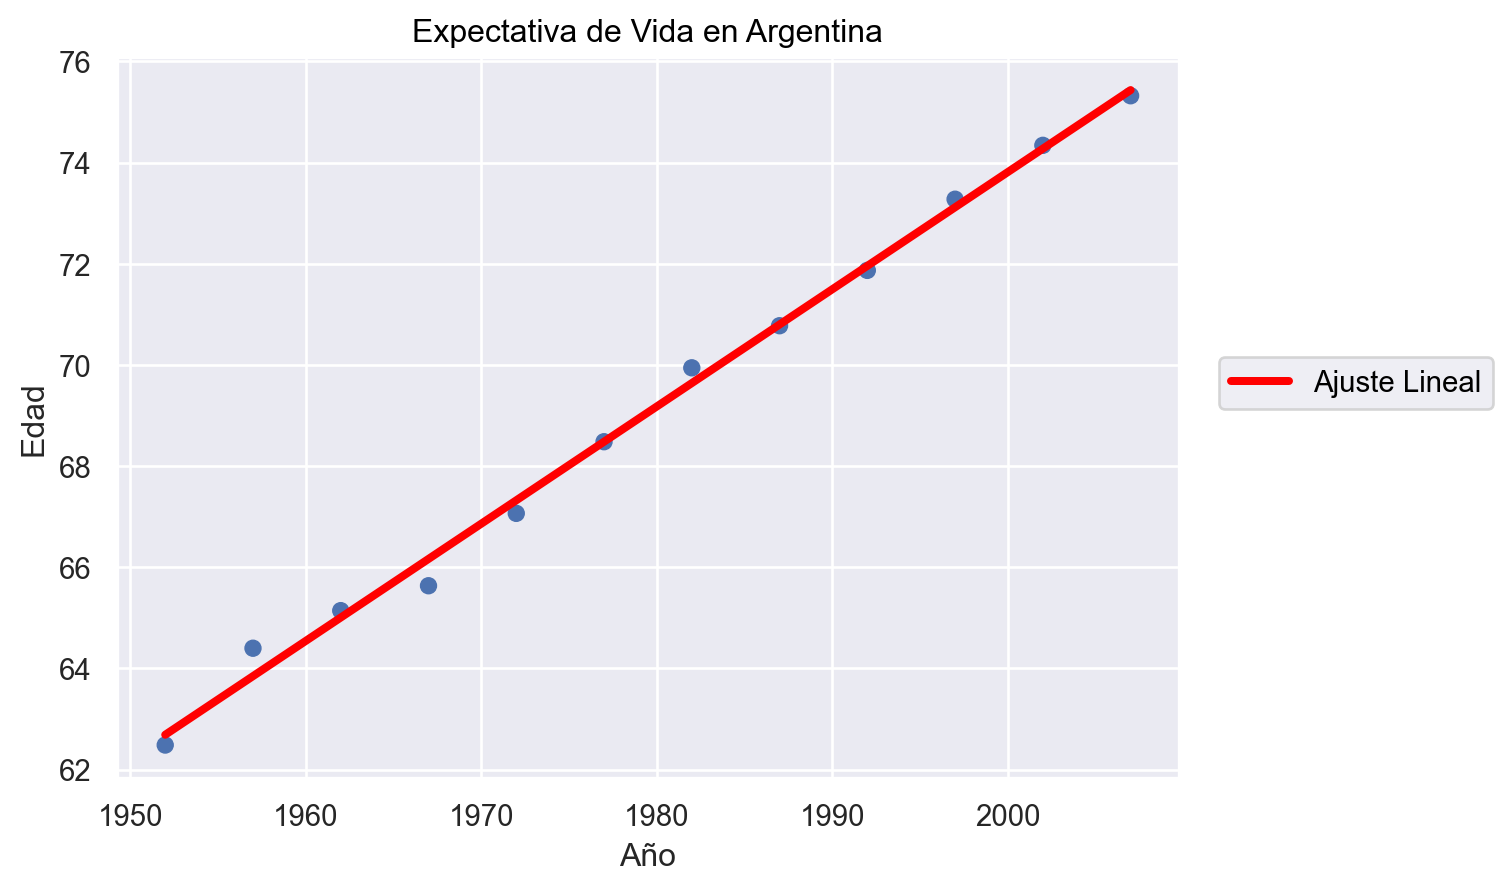

In [58]:
(
    so.Plot(datos, x = "year", y = "lifeExp")
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=3), so.PolyFit(1), label="Ajuste Lineal")
    .label(title="Expectativa de Vida en Argentina", x = "Año", y = "Edad")
)

In [59]:
modelo = linear_model.LinearRegression() # inicializamos un modelo de regresion lineal
modelo.fit(datos[['year']], datos[['lifeExp']]) # realizamos el ajuste
beta_1 = modelo.coef_[0][0]
beta_0 = modelo.intercept_[0]
print(beta_1, beta_0)

# modelo.fit le tengo que pasar un DataFrame
print(type(datos['year'])) # si uso esto, tira error de tipo
print(type(datos[['year']])) # debo usar este

0.23170839160839155 -389.6063445221444
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


2. En este ejercicio trabajaremos con el dataset de inmuebles(`ìnmuebles.csv` en la carpeta de datasets). El dataset contiene datos sobre inmebles que estan a la venta en cierta ciudad: su superficie en m², su precio en millones de pesos y la zona de la ciudad donde se encuentra. Recordar como cargar un dataset desde un `.csv` y visudalizar sus primeras filas:


In [23]:
datos = pd.read_csv("../../datasets/inmuebles.csv")
datos.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


2. (a) Realizar un grafico de dispersion (scatterplot) que muestre la relacion entre la superficie y el precio de cada inmueble

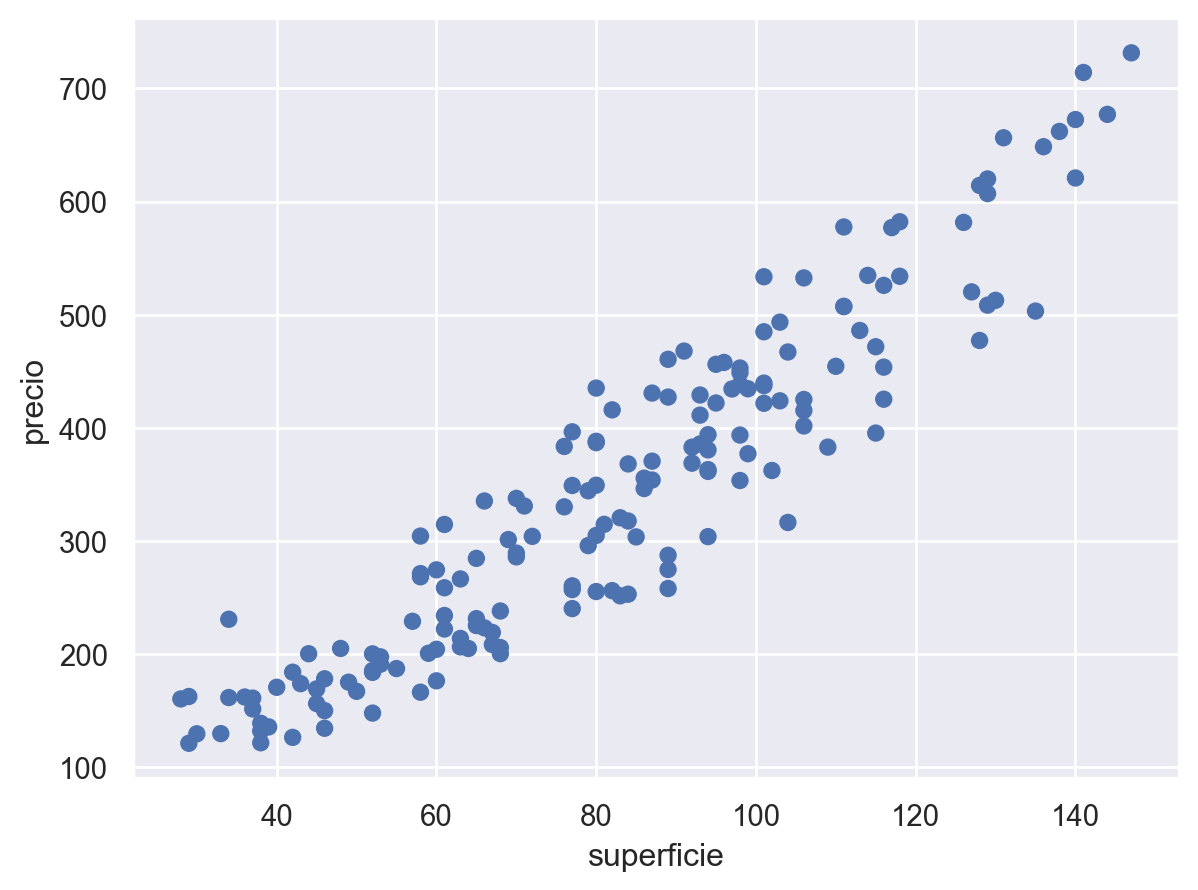

In [8]:
(
    so.Plot(datos, x = "superficie", y = "precio")
    .add(so.Dot())
)

2. (b) Realizar un grafico de la regresion lineal entre ambas variables. El grafico debe titularse "Datos Inmobiliarios" y la recta de Regresion Lineal debe tener una leyenda que diga "Regresion".

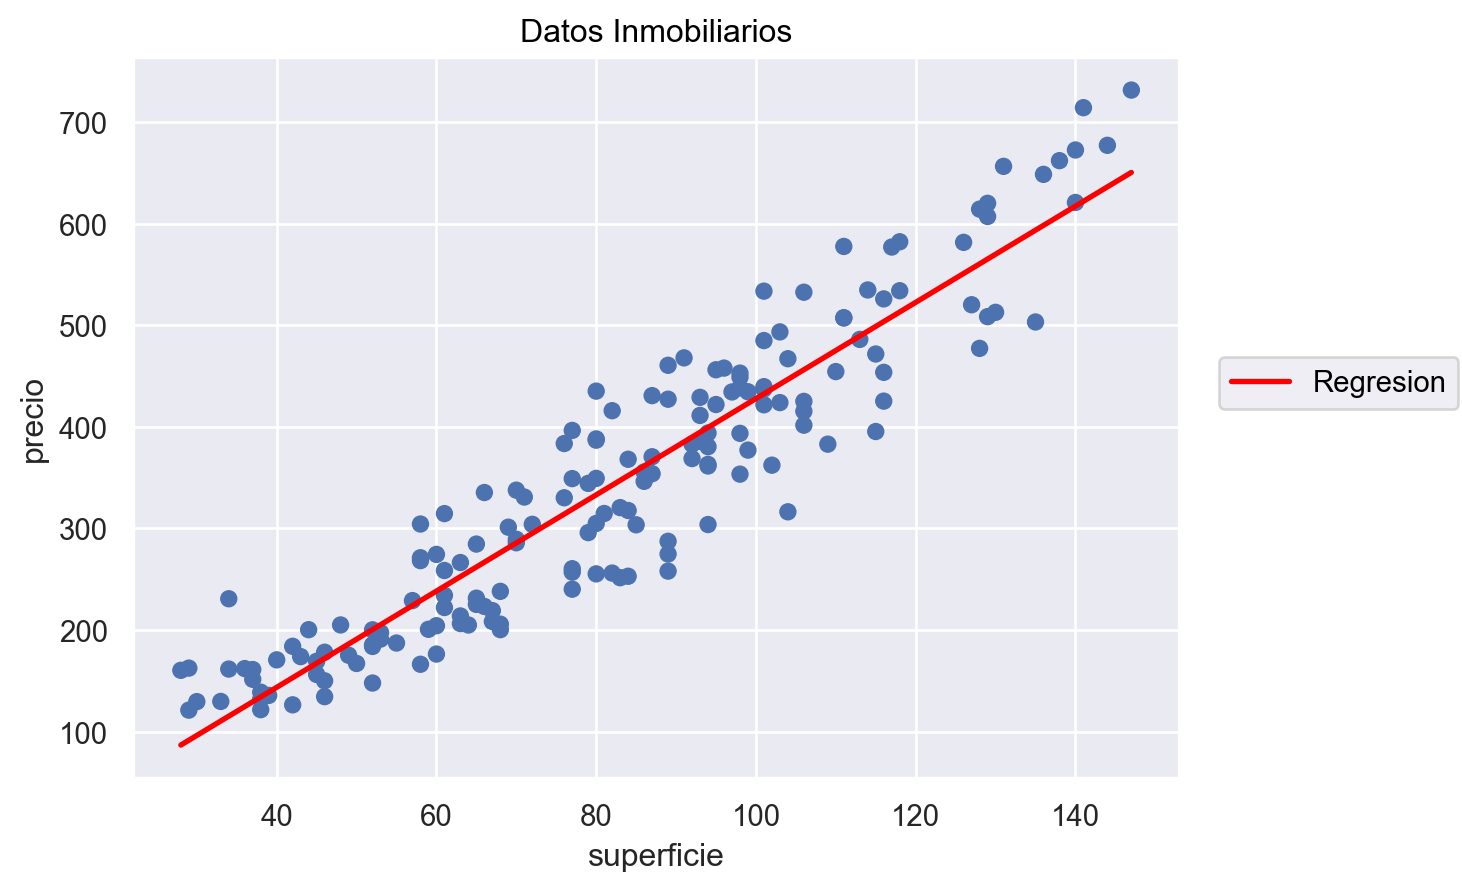

In [9]:
(
    so.Plot(datos, x = "superficie", y = "precio")
    .add(so.Dot())
    .add(so.Line(color="red", linewidth=2), so.PolyFit(1), label="Regresion")
    .label(title="Datos Inmobiliarios")
)

2. (c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Segun el modelo, ¿qué podriamos interpretar sobre el costo del metro cuadrado en la ciudad?

In [24]:
inmuebles = datos
modelo = linear_model.LinearRegression()
modelo.fit(inmuebles[['superficie']], inmuebles[['precio']])
beta_1, beta_0 = modelo.coef_[0][0], modelo.intercept_[0]
print("Recta de ajuste lineal de los datos: Y =", round(beta_1, 2),"X +", round(-beta_0, 2) )

Recta de ajuste lineal de los datos: Y = 4.74 X + 45.73


Podemos interpretar que como la ecuacion de la recta de ajuste lineal es $Y = 4.74 X + 45.73$, el precio en millones de pesos es aproximadamente 4,7 veces la superficie del terreno.

2. (d) Para medir que tan bien ajusta la recta a los datos, vamos a implementar dos funciones: una que calcule el error cuadratico medio (ECM) y otra que calcule el coeficiente de determinacion $R²$. 

In [ ]:
def ecm(x: pd.Series|np.ndarray, y: pd.Series|np.ndarray, beta_1: float, beta_0: float):
    pred = beta_1 * x + beta_0
    res = np.mean((y - pred)**2)
    return res

def r_cuad(x: pd.Series|np.ndarray, y: pd.Series|np.ndarray, bepreciota_1: float, beta_0: float):
    y_mean = y.mean()
    pred = beta_1 * x + beta_0
    res = np.sum((pred - y_mean)**2)/np.sum((y - y_mean)**2)
    return res

2. (e) Utilizando las funciones implementadas en el ítem anterior, calcular el ECM y el $R^2$ del ajuste realizado en el item (b). ¿En qué unidades está cada medida? ¿Cómo podemos
interpretarlas?

In [12]:
x = inmuebles["superficie"]
y = inmuebles["precio"]

print(ecm(x, y, beta_1, beta_0))
print(r_cuad(x, y, beta_1, beta_0))


2630.9300019446955
0.8762114698357931


Ok, el ECM nos da 2630, para ver que significa, busco la raiz del ECM, el cual es aproximadamente 51, entonces, esto significa que nuestras predicciones pueden desviarse \$ 50M de pesos del valor real.

2. (f) Comparar los resultados obtenidos en el ítem anterior con los proporcionados por `r2_score`
y `mean_squared_error` del bueno de `scikit-learn`

In [ ]:
y_pred = modelo.predict(inmuebles[["superficie"]])
r2_score(inmuebles[["precio"]], y_pred)

0.8762114698357936

In [14]:
mean_squared_error(inmuebles[["precio"]], y_pred)

2630.9300019446955

Dio lo mismo :D

2. (g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad
de precios. ¿Hay algún outlier?

<Axes: xlabel='zona', ylabel='precio'>

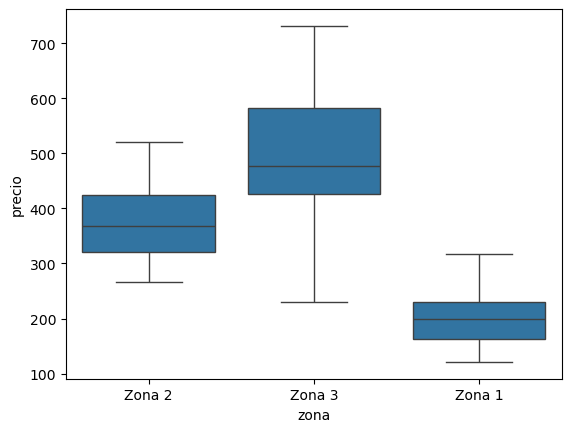

In [15]:
(
    sns.boxplot(inmuebles, x=inmuebles["zona"], y=inmuebles["precio"])
)

Se ve que en la zona 3, el precio varia mucho mas, ya que el rango de valores, varia desde 250 hasta 750, sin outliers.

2. (h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta
que mejor aproxima a los datos.

In [16]:
# Definimos las zonas
zona1 = inmuebles[inmuebles["zona"] == "Zona 1"]
zona2 = inmuebles[inmuebles["zona"] == "Zona 2"]
zona3 = inmuebles[inmuebles["zona"] == "Zona 3"]

In [17]:
# Calculamos lo pedido por el ejercicio
beta_11, beta_01 = coefs_rl(zona1["superficie"], zona1["precio"])
beta_12, beta_02 = coefs_rl(zona2["superficie"], zona2["precio"])
beta_13, beta_03 = coefs_rl(zona3["superficie"], zona3["precio"])

ecm_zona1 = ecm(zona1["superficie"], zona1["precio"], beta_11, beta_01)
ecm_zona2 = ecm(zona2["superficie"], zona2["precio"], beta_12, beta_02)
ecm_zona3 = ecm(zona3["superficie"], zona3["precio"], beta_13, beta_03)

r_cuad_zona1 = r_cuad(zona1["superficie"], zona1["precio"], beta_11, beta_01)
r_cuad_zona2 = r_cuad(zona2["superficie"], zona2["precio"], beta_12, beta_02)
r_cuad_zona3 = r_cuad(zona3["superficie"], zona3["precio"], beta_13, beta_03)


2. (i) Graficar los datos y el ajuste lineal de cada zona utilizando el método `facet()`de `Plot()`
(recordar ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona?
¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c) ?

ECM de la Zona 1:  331.22746770470974
Coeficiente de determinacion de la Zona 1:  0.8559239192181759
ECM de la Zona 2:  611.4955812522104
Coeficiente de determinacion de la Zona 2:  0.8660272811462023
ECM de la Zona 3:  748.880090716043
Coeficiente de determinacion de la Zona 3:  0.9445652745220193


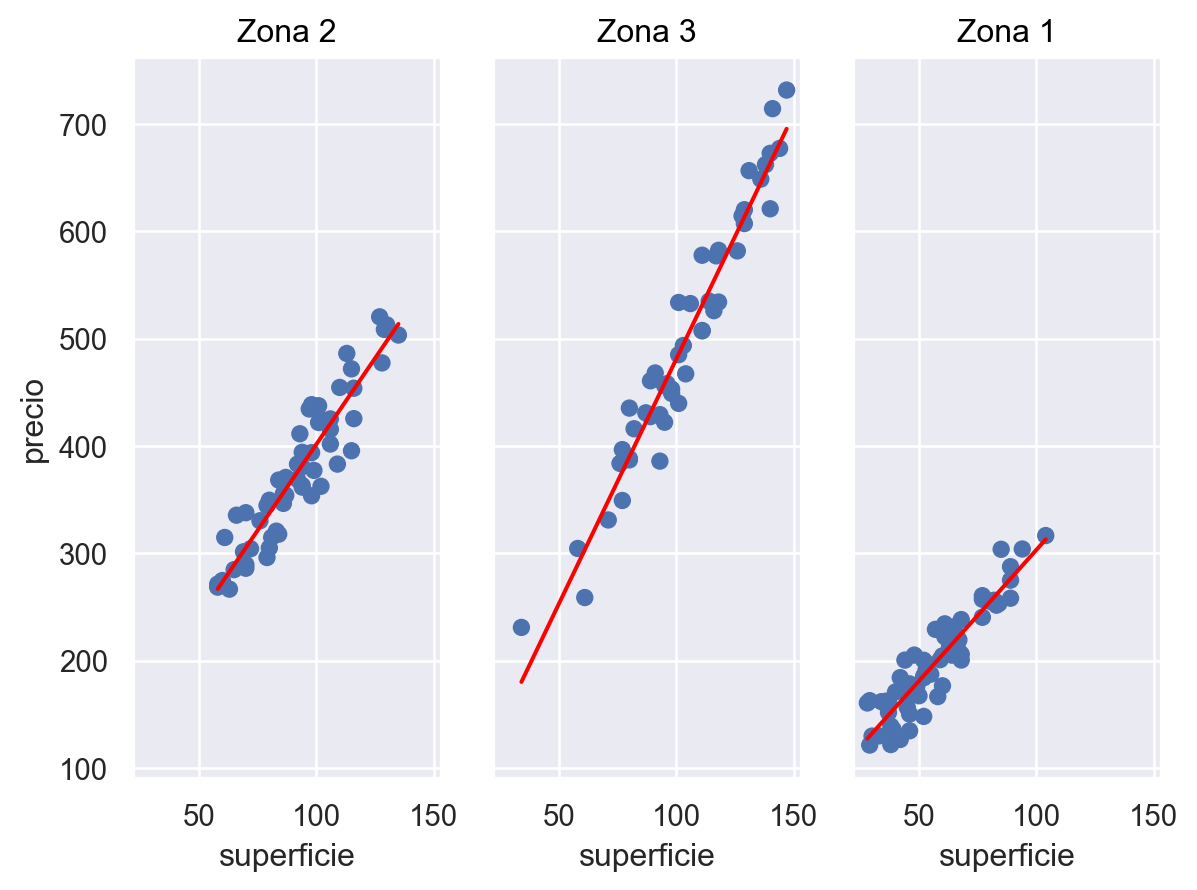

In [55]:
print("ECM de la Zona 1: ", ecm_zona1)
print("Coeficiente de determinacion de la Zona 1: ", r_cuad_zona1)
print("ECM de la Zona 2: ", ecm_zona2)
print("Coeficiente de determinacion de la Zona 2: ", r_cuad_zona2)
print("ECM de la Zona 3: ", ecm_zona3)
print("Coeficiente de determinacion de la Zona 3: ", r_cuad_zona3)

# subgraficos de los datos de cada zona 
(
    so.Plot(inmuebles, x, y)
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(1))
    .facet("zona")
    
)

La conclusion a la que podemos llegar con los datos, es
- Realizar el ajuste lineal por zona otorga un mejor predictor de los datos, ya que cada ECM calculado por zona es mas bajo que aquel del ajuste de los datos de todas las zonas juntas. Tiene sentido, ya que los datos se agrupan mejor cuando son separados por zona. Entonces esto puede ser util, si por ejemplo un comprador ya sabe en que zona quiere tener su terreno. De esta forma, el valor predicho es mas preciso. 
- El coeficiente de determinacion $R^2$ es muy alto en los tres casos, lo cual indica que la prediccion hecha por el ajuste es muy buena. En particular, la mejor es la prediccion del ajuste lineal de la zona 1, con un coeficiente $R^2 = 0.94$.

2. (j) Supongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa
información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia
para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo
el valor calculado anteriormente?

Aca la idea es primero usar el ajuste lineal global y luego usar el ajuste lineal individual de la zona 2, y ver si los valores cambian.

In [33]:
precio_aj_orig = round(beta_1 * 105 + beta_0, 2)
precio_aj_x_zona = round(beta_12 * 105 + beta_02, 2)

print("Precio de referencia de venta sin datos de zona: $", precio_aj_orig)
print("Precio de referencia de venta en zona 2: $", precio_aj_x_zona)

Precio de referencia de venta sin datos de zona: $ 451.53
Precio de referencia de venta en zona 2: $ 417.39


El valor cambia por unos \$30M de pesos. En particular, como el ECM del ajuste original es mayor que el ECM del ajuste por zona, y sus coeficiente $R^2$ son equivalentes en redondeo a dos decimales, la prediccion del ajuste por zona *deberia* ser mas preciso. 

2. (k) Si me ofrecen un inmueble de 100 m2 en la Zona 2 a un precio de 300, ¿qué tan barato o
caro es respecto a su precio de referencia?

In [ ]:
# Veamos cuanto da la prediccion del ajuste lineal por zona
valor = beta_12 * 100 + beta_02, 2 
# > $401.36

# Entonces, me lo estan dejando regalado, ya que deberia salir unos ~400M de pesos.

2. (l) *Efecto de los outliers*. En este item trabajaremos con los datos de `inmuebles_outliers.csv`,
que tiene los mismos datos que `inmuebles.csv`, salvo cuatro que son outliers.
   1. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outliers.
   1. Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos
en el ítem (h)

In [65]:
data = pd.read_csv("../../datasets/inmuebles_outliers.csv")
data.head()

,superficie,precio,zona
0,110.0,454.425690,Zona 2
1,109.0,383.004114,Zona 2
2,101.0,437.362638,Zona 2
3,58.0,304.392486,Zona 3
4,129.0,620.027722,Zona 3


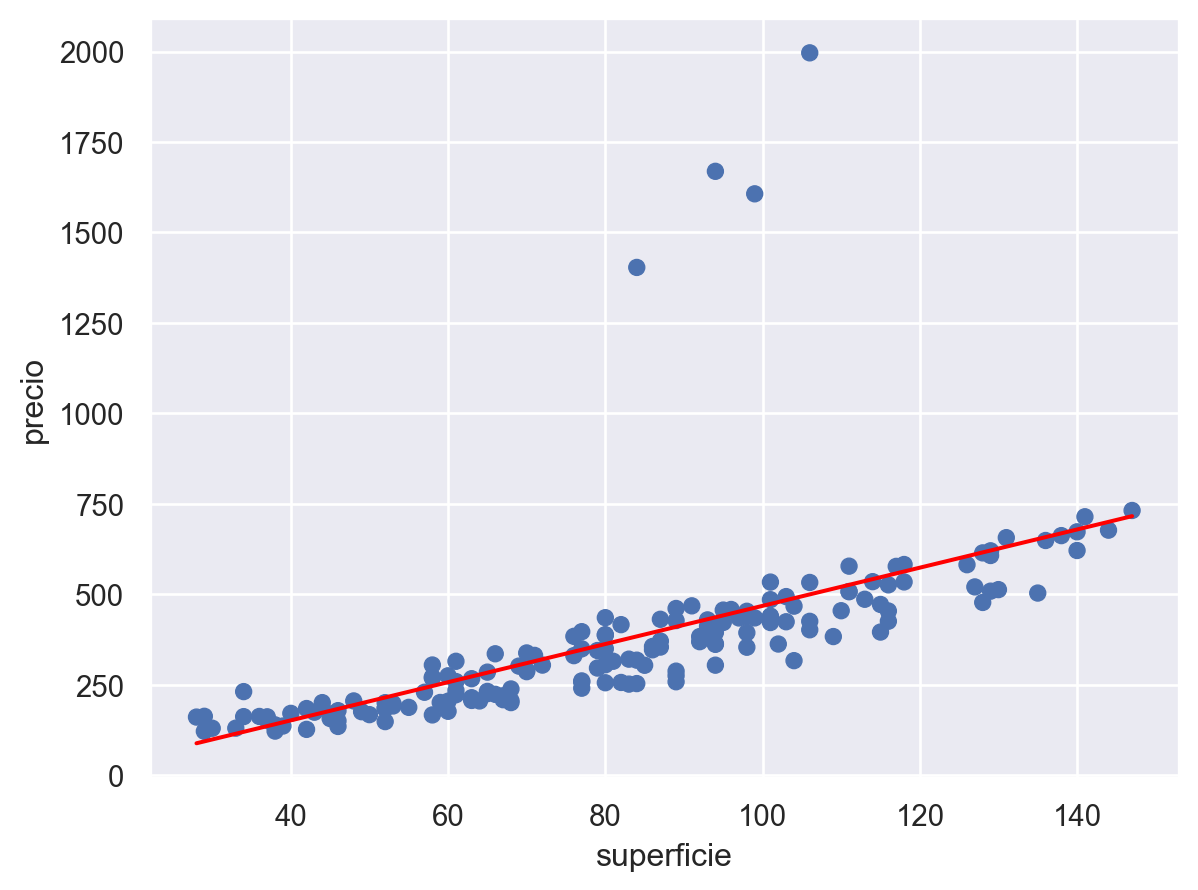

In [66]:
(
    so.Plot(data, x=data["superficie"], y=data["precio"])
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1))
)

No afecta taaaanto al ajuste lineal general, veamos los outliers en el boxplot.

<Axes: xlabel='zona', ylabel='precio'>

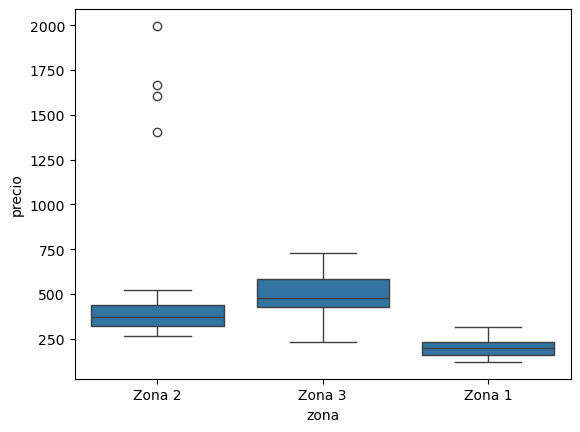

In [67]:
(
    sns.boxplot(data, x=data["zona"], y=data["precio"])
)

Son todos de la zona 2, veamos si ahora afecta a las predicciones que puede hacer la zona 2.

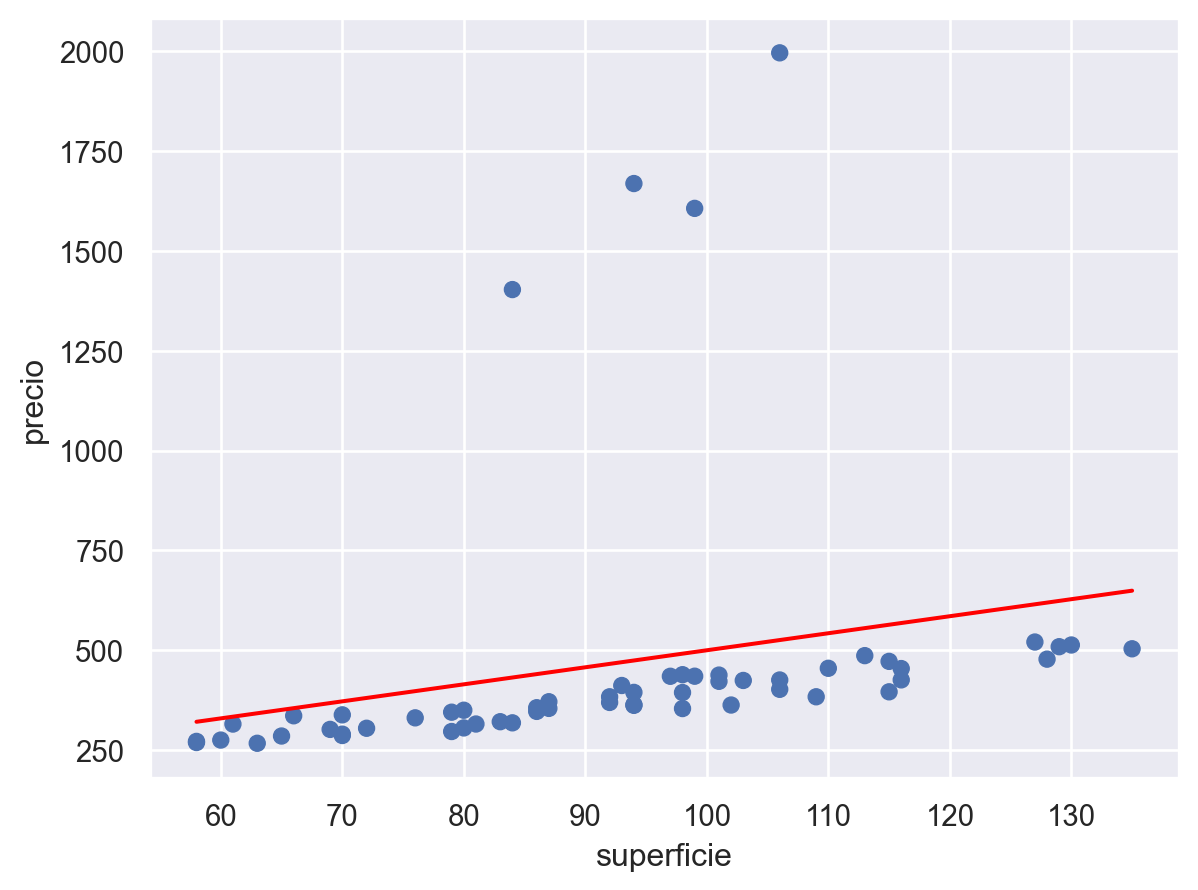

In [68]:
data2 = data[data["zona"] == "Zona 2"]
(
    so.Plot(data2, x=data2["superficie"], y=data2["precio"])
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1))
)

Es una verga el ajuste si estan los outliers. Veamos como son los coeficientes de esta recta:

In [88]:
beta_1_outliers, beta_0_outliers = coefs_rl(data2['superficie'], data2['precio'])
beta_1_outliers = round(beta_1_outliers, 2)
beta_0_outliers = round(beta_0_outliers, 2)
print(f"Y = {beta_1_outliers} X + {beta_0_outliers}")
print(f"ECM: {ecm(data2['superficie'], data2['precio'], beta_1_outliers, beta_0_outliers)}")
print(f"Coeficiente R^2: {r_cuad(data2['superficie'], data2['precio'], beta_1_outliers, beta_0_outliers)}")

Y = 4.27 X + 72.89
ECM: 109772.08700496047
Coeficiente R^2: 0.060038744969818404


En efecto, es muy choto el ajuste. 

Pasamos de un ajuste lineal con un ECM $=600$ y un coeficiente $R^2 = 0.87$ a un ajuste con un ECM $=100000$ y un coeficiente $R^2 = 💀 0.06💀$

3. En el archivo bitcoin.csv se encuentran datos de cotizacion de Bitcoin desde el 17/09/2014
hasta el 19/02/2022. Cargamos el dataset:


In [89]:
btc = pd.read_csv("../../datasets/bitcoin.csv")
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100



Nos interesa analizar la evolución del precio de cierre (*Close*) en periodo comprendido entre el 01/01/2021 y el 01/07/2021:

In [100]:
# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd.to_datetime(btc['Date'], format ='%Y-%m-%d')
# Filtramos el dataset en el periodo de interes
btc_2021 = btc[(btc['Date']>"2021-01-01")&(btc['Date']<"2021-07-01")]
btc_2021.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2299,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2300,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2301,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914063,31971.914063,81163475344
2302,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782
2303,2021-01-06,34013.613281,36879.699219,33514.035156,36824.363281,36824.363281,75289433811


Visualizar el ajuste lineal para los datos del dataframe `btc_2021`. En este caso, ¿resulta más
conveniente un scatterplot o un gráfico de lineas para los datos? ¿Te resultaría útil utilizar esta
recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?

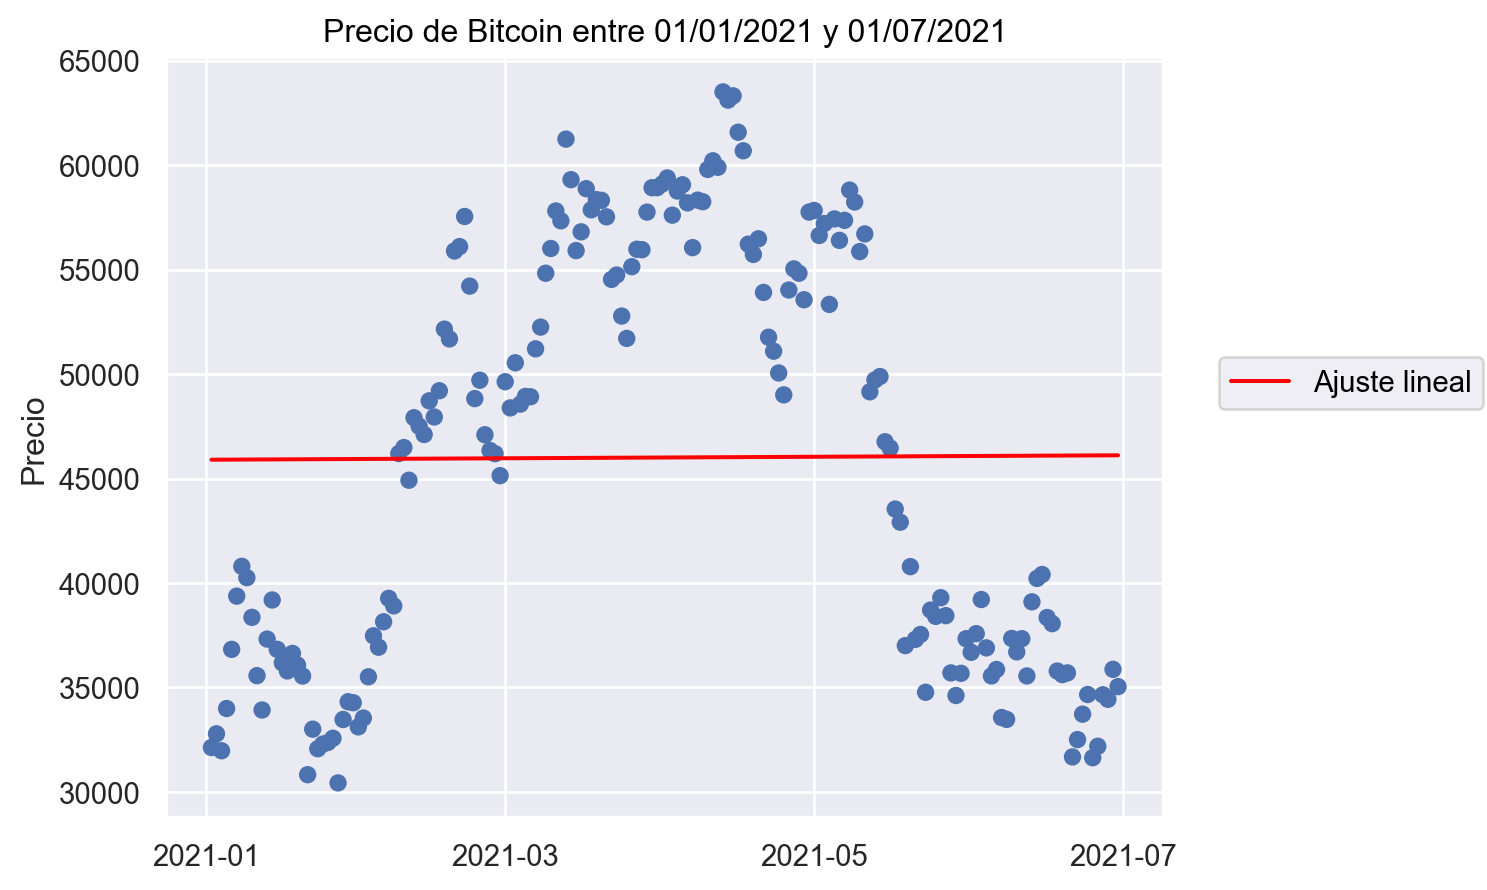

In [109]:
(
    so.Plot(btc_2021, x=btc_2021['Date'], y=btc_2021['Close'])
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(1), label="Ajuste lineal")
    .label(title="Precio de Bitcoin entre 01/01/2021 y 01/07/2021", x="", y="Precio")
)

Gaga, intentemos con el polinomio de ajuste de grado 4 🗿

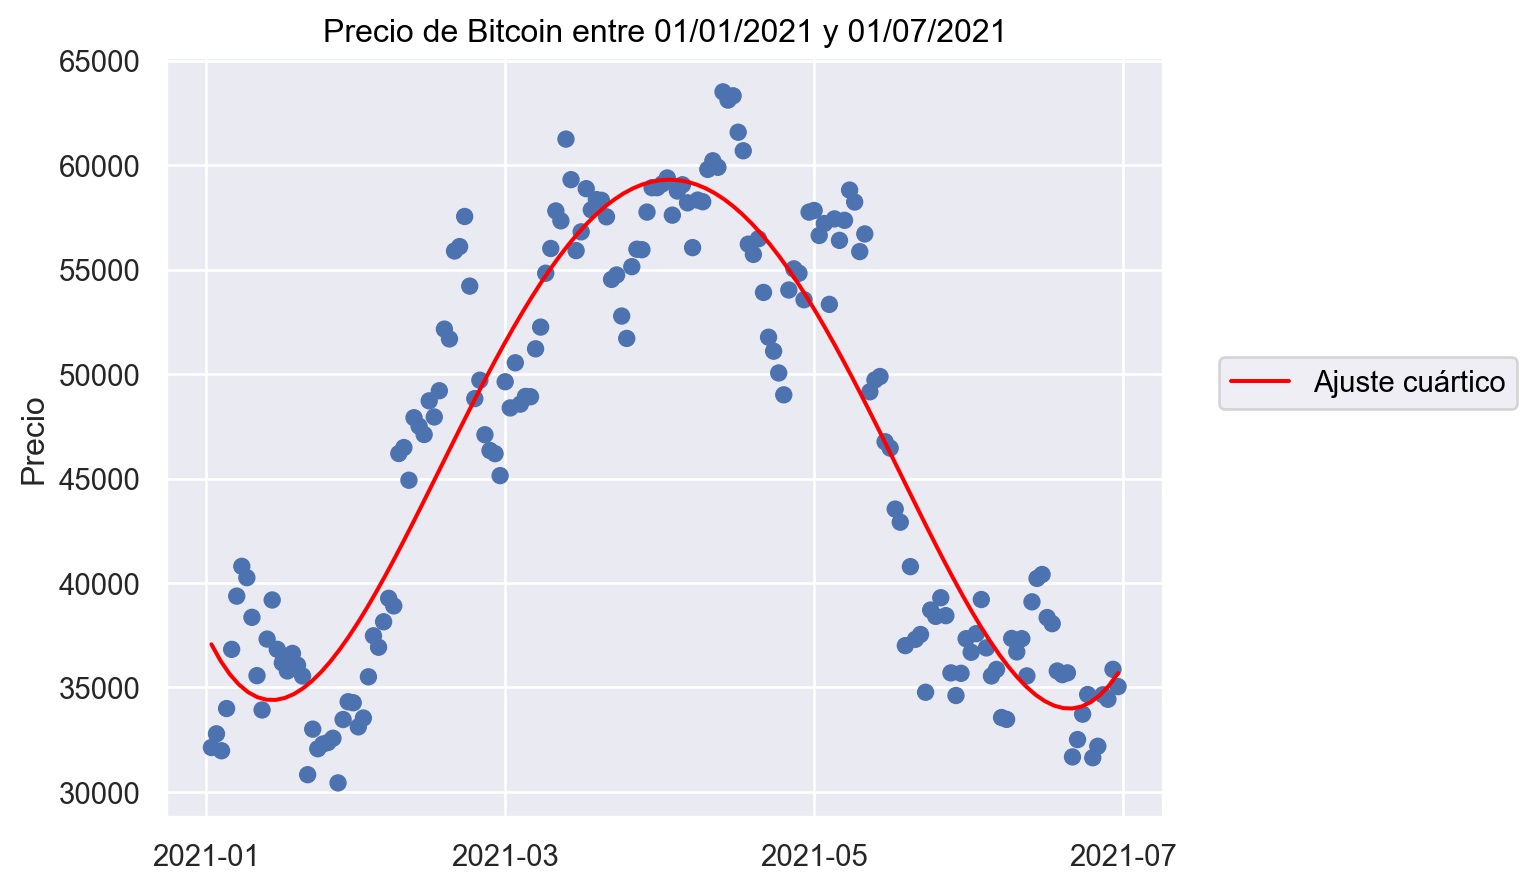

In [130]:
(
    so.Plot(btc_2021, x=btc_2021['Date'], y=btc_2021['Close'])
    .add(so.Dot())
    .add(so.Line(color="red"), so.PolyFit(4), label="Ajuste cuártico")
    .label(title="Precio de Bitcoin entre 01/01/2021 y 01/07/2021", x="", y="Precio")
)

4. Utilizando el dataset `tips` de seaborn
realizar la Regresión Lineal donde la variable $X$ es `total_bill` menos el promedio de `total_bill`
y la variable $Y$ es `tip`.

4. (a) ¿Qué interpretación se le puede dar a $β_0$? *Pista*: calcular el promedio de las propinas

In [ ]:
datos = sns.load_dataset('tips')
datos.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [132]:
X = datos['total_bill'] - datos['total_bill'].mean()
Y = datos['tip']
beta_1, beta_0 = coefs_rl(X, Y)
print(f"Beta 0: {beta_0}")
print(f"Promedio de propinas: {datos['tip'].mean().item()}")

Beta 0: 2.99827868852459
Promedio de propinas: 2.99827868852459


Son lo mismo! Veamos porque:
$$ Y = \beta_1 X - \beta_0$$
$$ Y = \beta_1 X - (\overline{Y} - \beta_1 \overline{X})$$
Como $X = X -\overline{X}$, 
$$ Y = \beta_1 (X -\overline{X}) - (\overline{Y} - \beta_1 \overline{X})$$
$$ Y = \beta_1 X -\beta_1 \overline{X} - \overline{Y} +\beta_1 \overline{X}$$
$$ Y = \beta_1 X  - \overline{Y} $$
Por tanto, 
$$\beta_1 X - \beta_0 =  \beta_1 X  - \overline{Y} $$
$$\therefore \beta_0 =  \overline{Y} $$

4. (b) ¿Cambia el valor de $β_1$ respecto a la Regresión Lineal de `total_bill` vs. `tip`?

Not implemented

5. En este ejercicio utilizaremos el dataset `healthexp` de `seaborn`, donde se recopila cada año
(`Year`) lo que cada país (`Country`) invierte en salud por habitante (`Spending_USD`) y su
expectativa de vida (`Life_Expectancy`).
Nos enfocaremos en los datos de Japón, nuestra variable predictora será `Spending_USD` y la
dependiente será `Life_Expectancy`.

In [152]:
data = sns.load_dataset('healthexp')
data = data[data['Country'] == 'Japan']
data.head().set_index('Year')

,Country,Spending_USD,Life_Expectancy
Year,,,
1970,Japan,150.437,72.0
1971,Japan,163.854,72.9
1972,Japan,185.390,73.2
1973,Japan,205.778,73.4
1974,Japan,242.018,73.7



5. (a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado
3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del
gráfico.


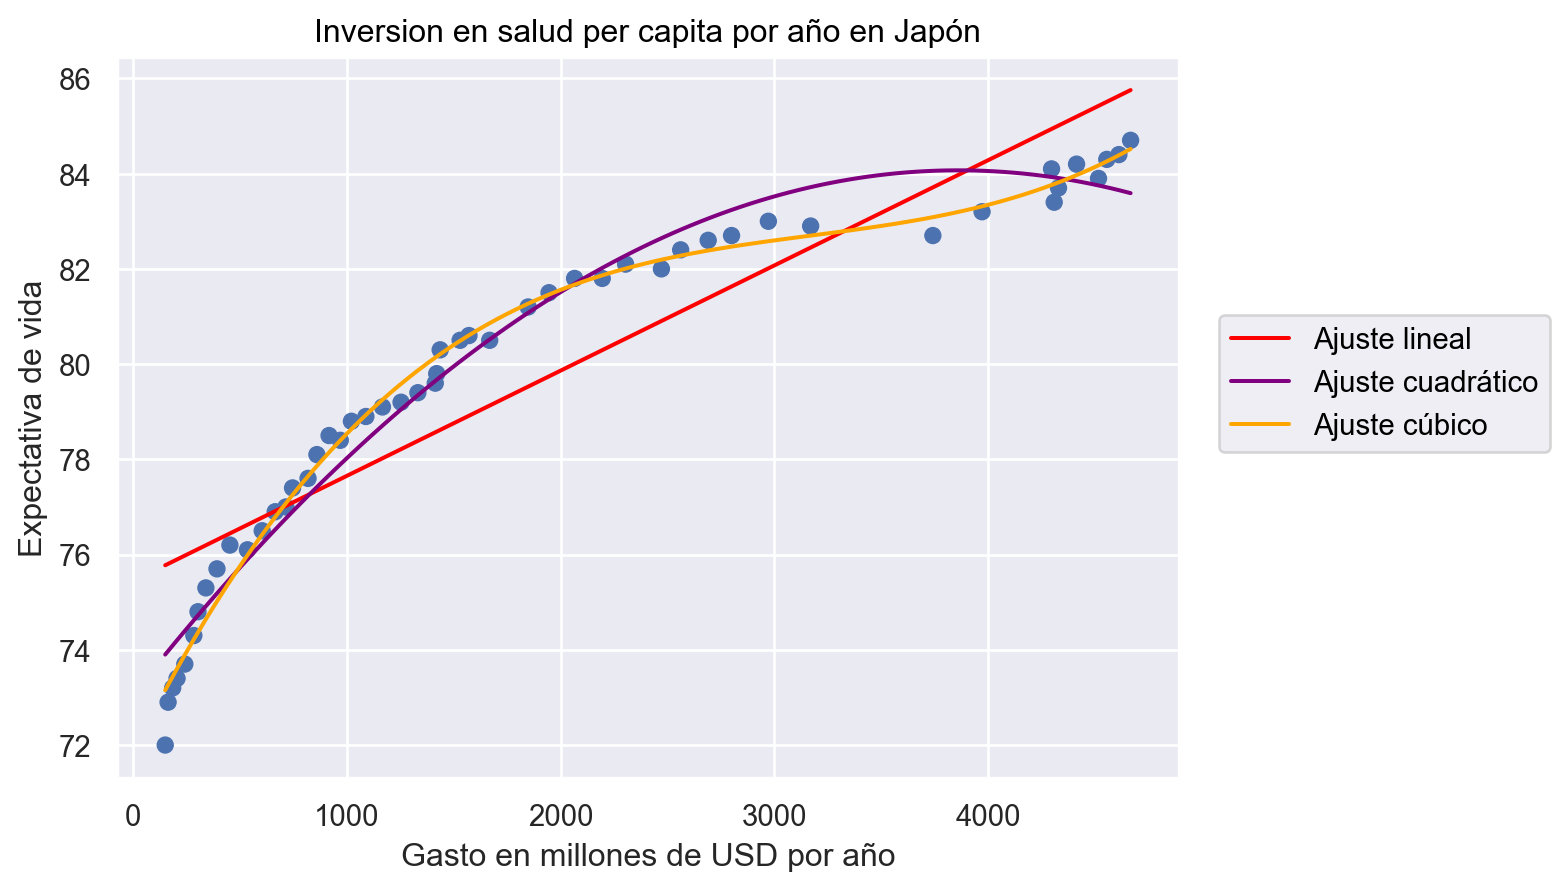

In [ ]:
(
    so.Plot(data, x = data['Spending_USD'], y = data['Life_Expectancy'])
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(1), label="Ajuste lineal")
    .add(so.Line(color='purple'), so.PolyFit(2), label="Ajuste cuadrático")
    .add(so.Line(color='orange'), so.PolyFit(3), label="Ajuste cúbico")
    .label(title="Inversion en salud per capita por año en Japón", x="Gasto en millones de USD por año", y="Expectativa de vida")
)

5. (b) En base al gráfico obtenido en el ítem anterior, elegir el grado que considerás que mejor
ajusta a los datos. Utilizando scikit-learn, calcular los coeficientes de ese polinomio.


Claramente el de grado 3 es el que mejor ajusta los datos, calculo sus coeficientes.

In [ ]:
polynomial_features = PolynomialFeatures(degree=3, include_bias=False)  
x_poly = polynomial_features.fit_transform(data[['Spending_USD']])   
modelo = linear_model.LinearRegression()
modelo.fit(x_poly, data['Life_Expectancy'])

beta = modelo.coef_
o_origen = modelo.intercept_.item()

# Imprimimos los valores:
print('beta_0: ', o_origen)
print('beta_1: ', beta[0])
print('beta_2: ', beta[1])
print('beta_3: ', beta[2])

beta_0:  71.84403247811414
beta_1:  0.00909766222027931
beta_2:  -2.684173321376585e-06
beta_3:  2.8216848452775663e-10



5. (c) Calcular el R2 y el ECM.

In [185]:
y_pred = modelo.predict(x_poly)
r2_score(data["Life_Expectancy"], y_pred)

0.9912790933475436

Que lo pario da $R^2 = 0.99$ .

In [186]:
mean_squared_error(data["Life_Expectancy"], y_pred)

0.1075828613870723

Asumo que esto seria que le estamos errando por un decimo de año a la edad que podamos predecir.

5. (d) Según el polinomio obtenido en el ítem anterior, estimar cuál sería la expectativa de vida
de los habitantes de Japón si el país invirtiera U$D 5000.


In [194]:
modelo.predict([[1990, 1990**2, 1990**3]]).item()

81.54244220348751

5. (e) Visualizar el polinomio de grado 10 que mejor ajusta a los datos. ¿Se aprecia una mejora?
¿Resulta conveniente ajustar con un polinomio de grado 50?

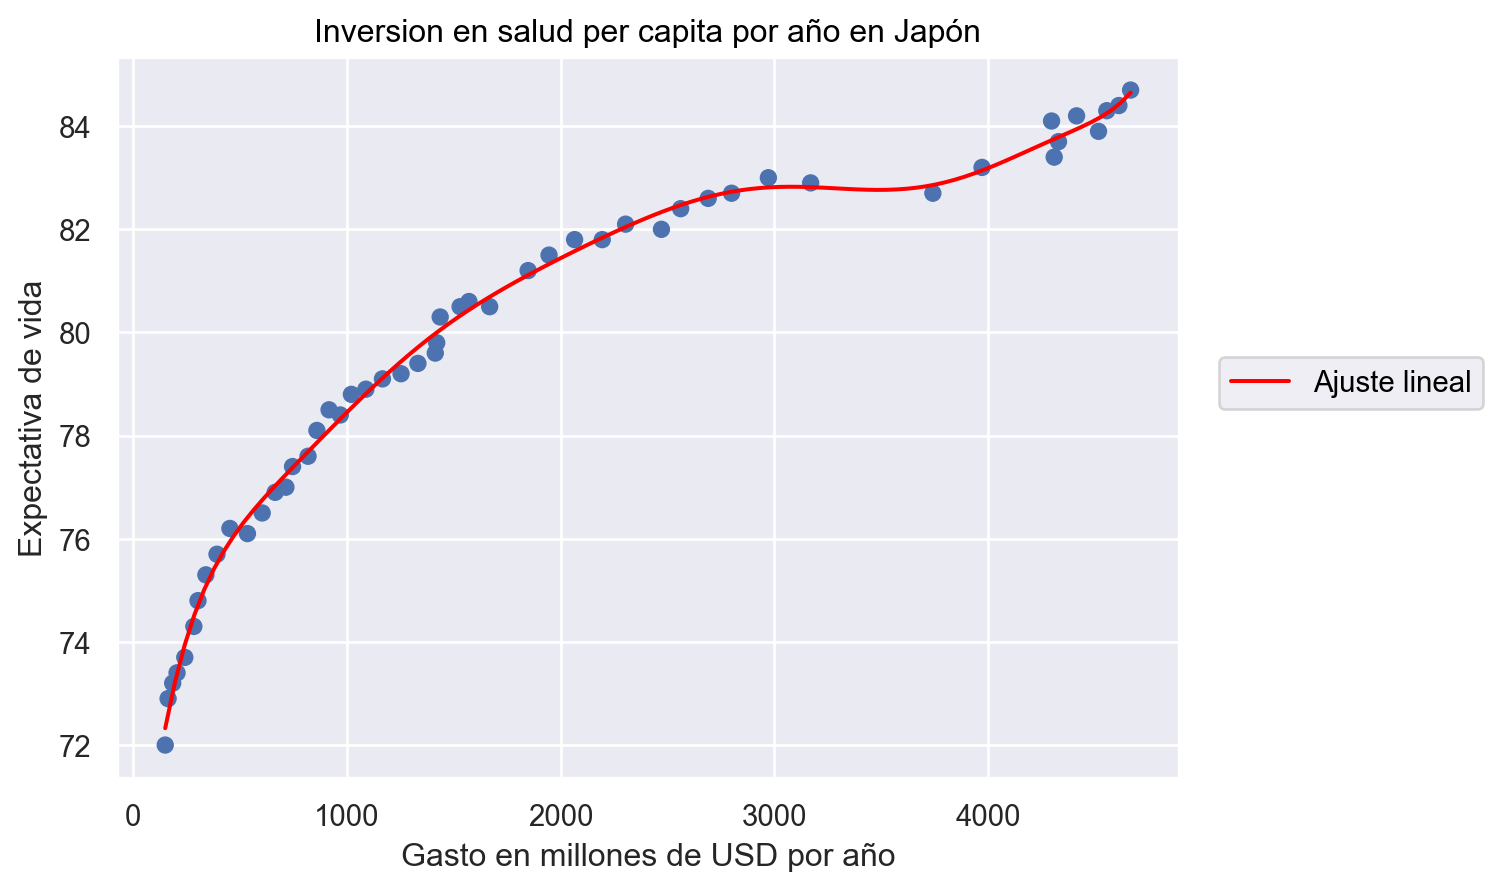

In [195]:
(
    so.Plot(data, x = data['Spending_USD'], y = data['Life_Expectancy'])
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(10), label="Ajuste lineal")
    .label(title="Inversion en salud per capita por año en Japón", x="Gasto en millones de USD por año", y="Expectativa de vida")
)

In [196]:
polynomial_features = PolynomialFeatures(degree=10, include_bias=False)  
x_poly = polynomial_features.fit_transform(data[['Spending_USD']])   
modelo = linear_model.LinearRegression()
modelo.fit(x_poly, data['Life_Expectancy'])
y_pred = modelo.predict(x_poly)
r2_score(data["Life_Expectancy"], y_pred)

0.5391192281585977

No mejora, aunque graficamente parezca que se ajusta mejor, es un peor predictor. 